In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
execfile('ML_Challenge_data_preprocessing.py')

('Generated X with shape ', (347698, 1000))
('Generated y with shape ', (347698,))


In [3]:
# split into promotors and enhancers
promoter_idcs = (y == 0).nonzero()[0]
num_promoters = len(promoter_idcs)
enhancer_idcs = (y == 1).nonzero()[0]
num_enhancers = len(enhancer_idcs)
assert(num_promoters + num_enhancers == X.shape[0])
promoter_X = X[promoter_idcs,]
enhancer_X = X[enhancer_idcs,]
print promoter_X.shape
print enhancer_X.shape

(274299, 1000)
(73399, 1000)


In [4]:
execfile('ngram_frequencies.py')

promoter_frequencies = {}
enhancer_frequencies = {}

for i in range(1000):
    promoter_randint = int(random.random()*promoter_X.shape[0])
    enhancer_randint = int(random.random()*enhancer_X.shape[0])
    pfreqs = ngram_frequencies(promoter_X[promoter_randint],2)
    efreqs = ngram_frequencies(enhancer_X[enhancer_randint],2)
    for ngram, frequency in pfreqs.iteritems():
        if ngram in promoter_frequencies:
            promoter_frequencies[ngram].append(frequency)
        else:
            promoter_frequencies[ngram] = [frequency]
    for ngram, frequency in efreqs.iteritems():
        if ngram in enhancer_frequencies:
            enhancer_frequencies[ngram].append(frequency)
        else:
            enhancer_frequencies[ngram] = [frequency]

Plotting frequency histogram for base pair AA


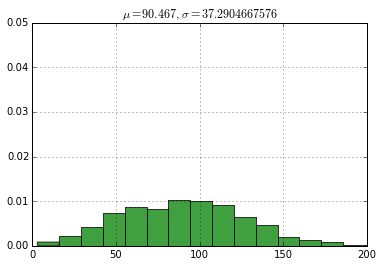

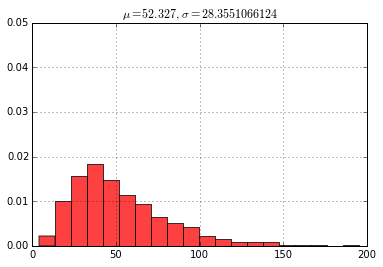




Plotting frequency histogram for base pair AC


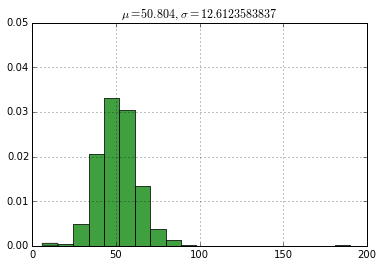

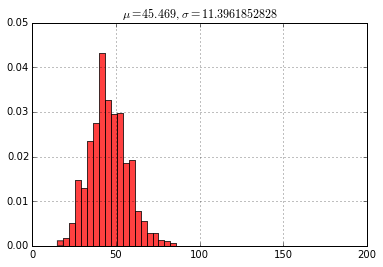




Plotting frequency histogram for base pair GT


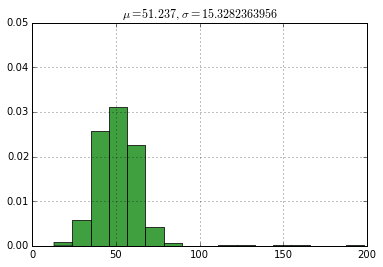

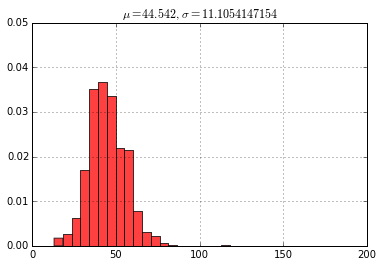




Plotting frequency histogram for base pair AG


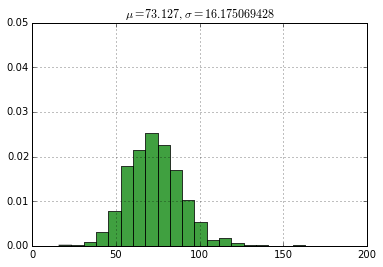

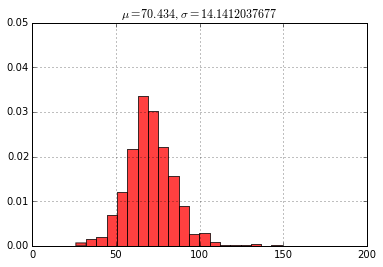




Plotting frequency histogram for base pair CC


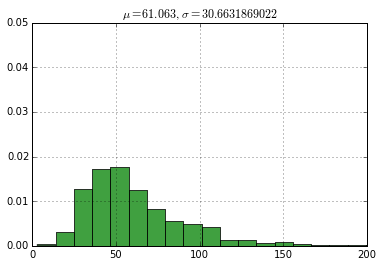

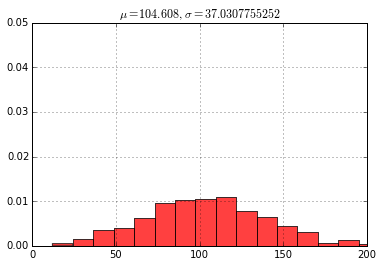




Plotting frequency histogram for base pair CA


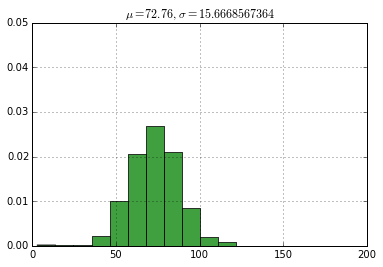

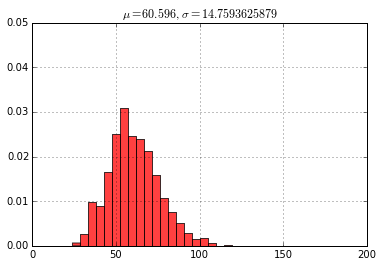




Plotting frequency histogram for base pair CG


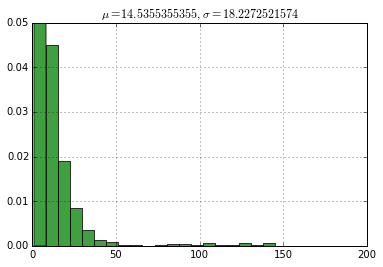

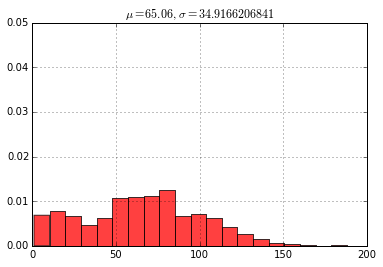




Plotting frequency histogram for base pair TC


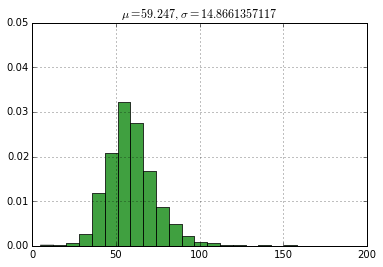

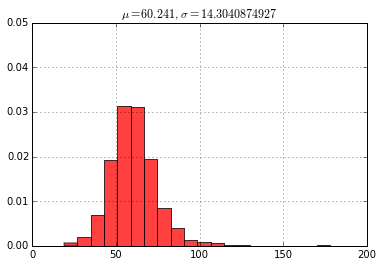




Plotting frequency histogram for base pair GG


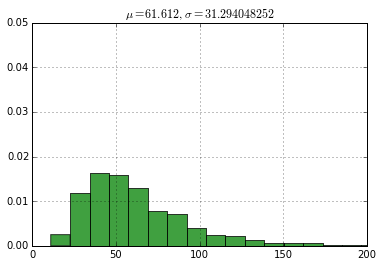

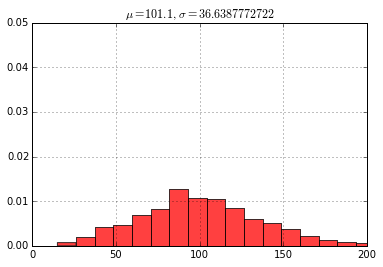




Plotting frequency histogram for base pair GC


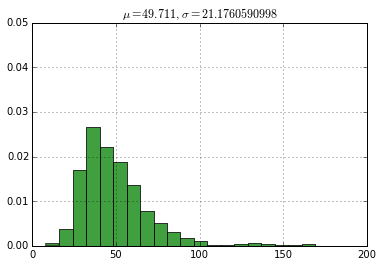

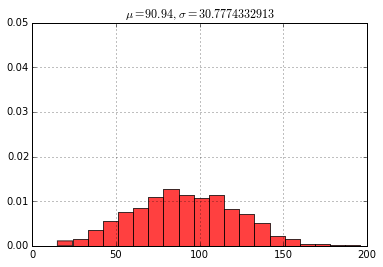




Plotting frequency histogram for base pair AT


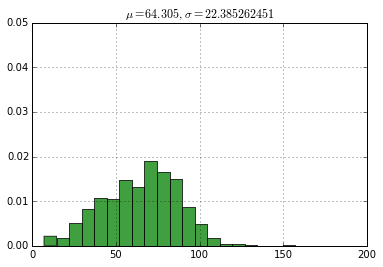

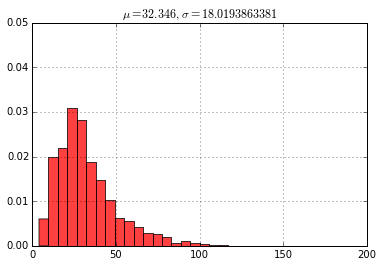




Plotting frequency histogram for base pair GA


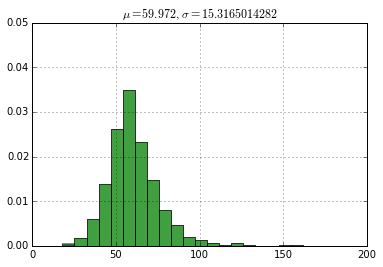

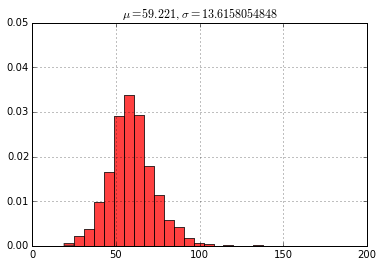




Plotting frequency histogram for base pair TG


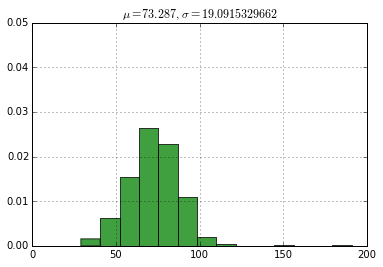

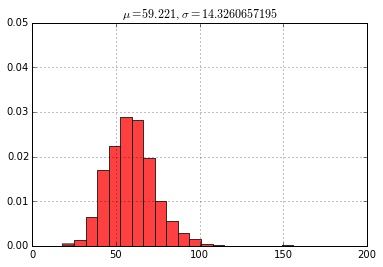




Plotting frequency histogram for base pair CT


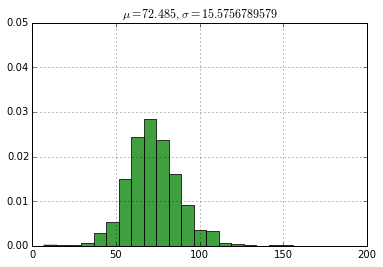

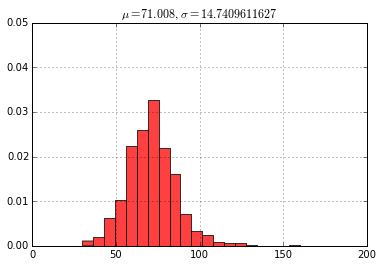




Plotting frequency histogram for base pair TT


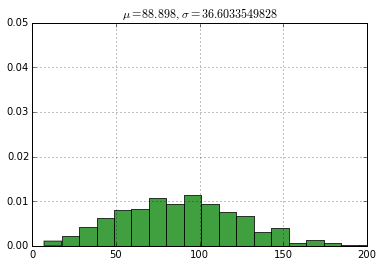

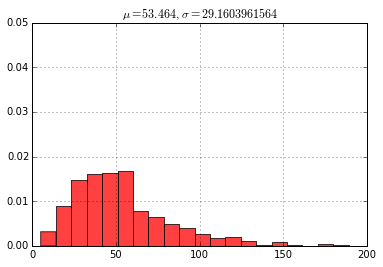




Plotting frequency histogram for base pair TA


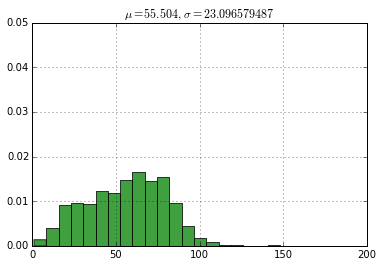

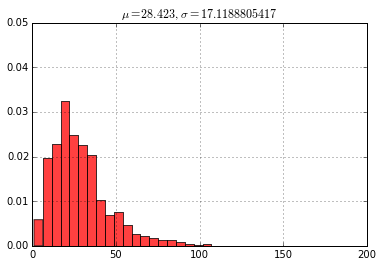

In [5]:
%matplotlib inline

def plot_frequency_hist(frequencies, ngram, color = 'green'):
    n, bins, patches = plt.hist(frequencies, 20, normed=1, facecolor=color, alpha=0.75)
    mu = np.mean(frequencies)
    sigma = np.std(frequencies)
    plt.title(r'$\mathrm{}\mu=' + str(mu) + ',\ \sigma=' + str(sigma) + '$')
    plt.axis([0.0, 200.0, 0.0, 0.05])
    # Note: there is a value lower, ths has cut some extremes
    plt.grid(True)
    plt.show()

for base_pair in enhancer_frequencies.keys():
    print 'Plotting frequency histogram for base pair ' + str(base_pair)
    plot_frequency_hist(enhancer_frequencies[base_pair], base_pair)
    plot_frequency_hist(promoter_frequencies[base_pair], base_pair, 'red')
    print "\n\n"

In [40]:
print promoter_frequencies.keys()
import csv
with open('possible_bigrams.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(promoter_frequencies.keys())

['AA', 'AC', 'GT', 'AG', 'CC', 'TT', 'CG', 'TC', 'GG', 'GC', 'AT', 'GA', 'TG', 'TA', 'CA', 'CT']
